## HW8 Assignment 1

### Task 1 - Event Detection

For this task, we are looking at the MTA Ridership data to understand events and identify prominent (or outlier) events

In [40]:
# standard imports
__author__ = 'tw1574'
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline


Populating the interactive namespace from numpy and matplotlib


To start, we pull in the data, which was provided as a numpy array, stored in the PUIdata directory

In [41]:
path = os.getenv('PUIDATA')+'/'

filename = 'MTA_Fare.npy'

mtarides = np.load(path+filename)

In [42]:
mtarides.shape

(600, 23, 194)

In [43]:
mtarides = mtarides.astype(np.float)
mtarides[mtarides < 0] = np.nan

In [45]:
print (mtarides.shape)

# first get the sum for all ticket types
mta_ticketsum = np.nansum(mtarides, axis=0)
print (mta_ticketsum.shape)

# next we collapse to the sums
mta_stationsum = np.nansum(mtarides, axis=1)
print (mta_stationsum.shape)

# calculate for the week sum
mta_weeksum = np.nansum(mta_ticketsum, axis=0)
print (mta_weeksum.shape)

# calculate for the week avg
mta_weekavg = np.average(mta_ticketsum, axis=0)
print (mta_weekavg.shape)


(600, 23, 194)
(23, 194)
(600, 194)
(194,)
(194,)


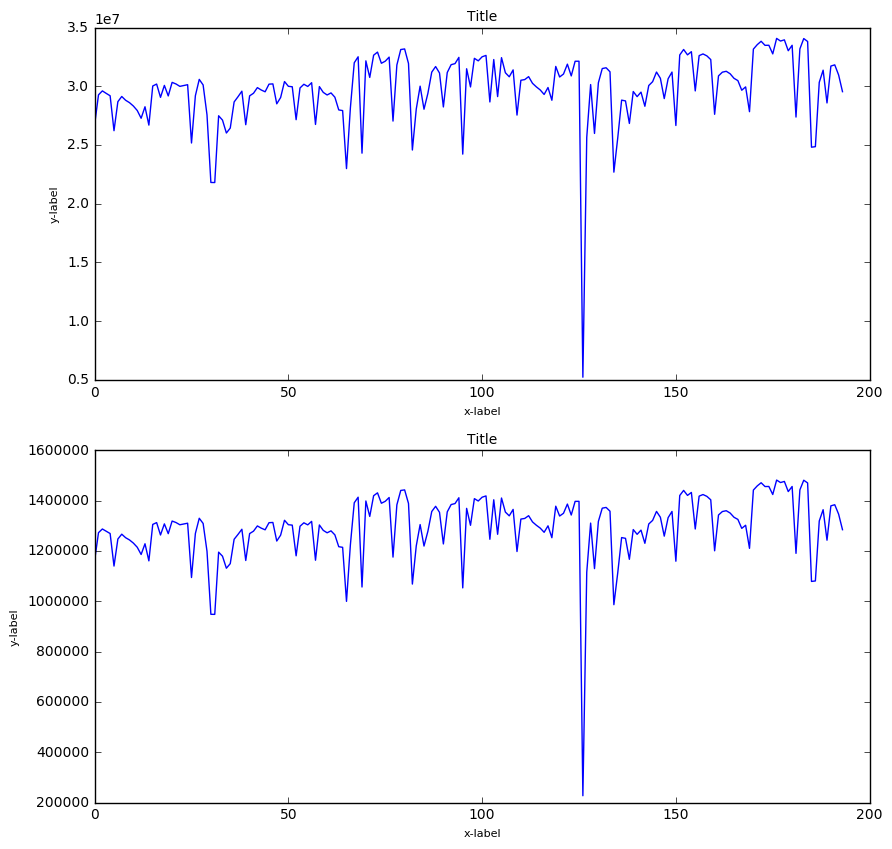

In [46]:
fig = pl.figure(figsize = (10,20));
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax1.plot(mta_weeksum)
ax1.set_xlabel('x-label', fontsize=8)
ax1.set_ylabel('y-label', fontsize=8)
ax1.set_title('Title', fontsize=10)

ax2.plot(mta_weekavg)
ax2.set_xlabel('x-label', fontsize=8)
ax2.set_ylabel('y-label', fontsize=8)
ax2.set_title('Title', fontsize=10)


#### There is a significant drop at around the 125th week.  What date is that?

#### To determine that, we create our weeks in a range against which we can plot.  We know the start date is 21 May 2010, so will start our range from there

In [51]:
start_date = datetime.date(2010, 5, 28) # seed the start date of the data
# create the date range for the weeks
weeks = np.array([start_date + datetime.timedelta(weeks=i) for i in range(194)])

#### Additionally, we want to understand the mean of our data and the thresholds (3 standard deviations) away from the mean

In [39]:
print ("Mean ridership {:.2f}".format(np.nanmean(mta_weeksum)))
print ("Std Dev of rides {:.2f}".format(np.nanstd(mta_weeksum)))
thresholds = [np.nanmean(mta_weeksum) + 3 * np.nanstd(mta_weeksum), 
              np.nanmean(mta_weeksum) - 3 * np.nanstd(mta_weeksum)]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

Mean ridership 29781349.87
Std Dev of rides 2983960.42
3-sigma thresholds 38733231.14 20829468.61


Mean ridership 29781349.87
Std Dev of rides 2983960.42
3-sigma thresholds 38733231.14 20829468.61


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


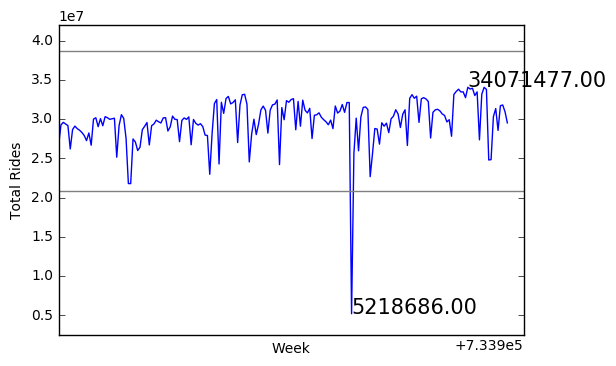

In [49]:
print ("Mean ridership {:.2f}".format(np.nanmean(mta_weeksum)))
print ("Std Dev of rides {:.2f}".format(np.nanstd(mta_weeksum)))
thresholds = [np.nanmean(mta_weeksum) + 3 * np.nanstd(mta_weeksum), 
              np.nanmean(mta_weeksum) - 3 * np.nanstd(mta_weeksum)]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

pl.plot(mta_weeksum)
pl.plot([xlim()[0], xlim()[1]], [thresholds[1], thresholds[1]], color='gray')
pl.plot([xlim()[0], xlim()[1]], [thresholds[0], thresholds[0]], color='gray')
pl.xticks(weeks, rotation=75, fontsize=10)
pl.xlabel('Week')
pl.ylabel('Total Rides')
pl.ylim(0.25e7, 4.2e7)
pl.plot(np.where(mta_weeksum == mta_weeksum.min())[0], mta_weeksum.min()) 
pl.text(np.where(mta_weeksum == mta_weeksum.min())[0], mta_weeksum.min(),\
        "%.2f"%mta_weeksum.min(), fontsize=15)
pl.plot(np.where(mta_weeksum == mta_weeksum.max())[0], mta_weeksum.max())  
pl.text(np.where(mta_weeksum == mta_weeksum.max())[0], mta_weeksum.max(), \
        "%.2f"%mta_weeksum.max(), fontsize=15)
pl.legend(fontsize=5)
pl.show()

In [56]:
print(mta_weeksum.min())
print(numpy.where(mta_weeksum == mta_weeksum.min()))
print(weeks[numpy.where(mta_weeksum == mta_weeksum.min())])

5218686.0
(array([126]),)
[datetime.date(2012, 10, 26)]
